<a href="https://colab.research.google.com/github/caliskate/ai-img-enhancement-webapp/blob/main/HF_Fine_tuning_Colorization%2BInpainting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installations

In [1]:
!pip install diffusers transformers accelerate --upgrade dotenv

Libraries

In [26]:
import torch
# Colorizer-------------------
from diffusers import StableDiffusionPipeline
from huggingface_hub import InferenceClient
# Inpainting ---------------
from diffusers import StableDiffusionInpaintPipeline
# ----------------------------------------
from google.colab import drive
import os
from dotenv import load_dotenv
from huggingface_hub import login
from PIL import Image, ImageDraw
from IPython.display import display

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:

# Env file path
env_path = "/content/drive/MyDrive/AAI-521 Final Project/hf_login.env"
# Open env file
load_dotenv(env_path)
# Assign key to local variable
hf_key = os.getenv('hf_login_key')
# Login using hf key
login(token=hf_key)


 Model 3. Image Colorization

In [31]:
# -------------------------
# Model 3. Image Colorization
# -------------------------

# Load Base Model - SD-1-5
colorizer_pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    dtype=torch.float32
)



# Recommended dataset (open-source)
# https://huggingface.co/datasets/detection-datasets/coco

# ImageNet: convert RGB images to grayscale for input, RGB for target
# https://www.image-net.org/

# Example: preprocessing images for colorization
# Convert to grayscale for model input
# Apply normalization, resizing as needed



Keyword arguments {'dtype': torch.float32} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [14]:
# Path to your test image
image_path = "/content/drive/MyDrive/AAI-521 Final Project/test_images/colorize_ex1.png"

colorize_test_image = Image.open(image_path).convert("RGB")

# Preprocessing
 -  Resize to ensure width and height are divisible by 8
 -  Prepare resized 3 channel img, SD expects 3 channels


(StableDiffusion requirements)

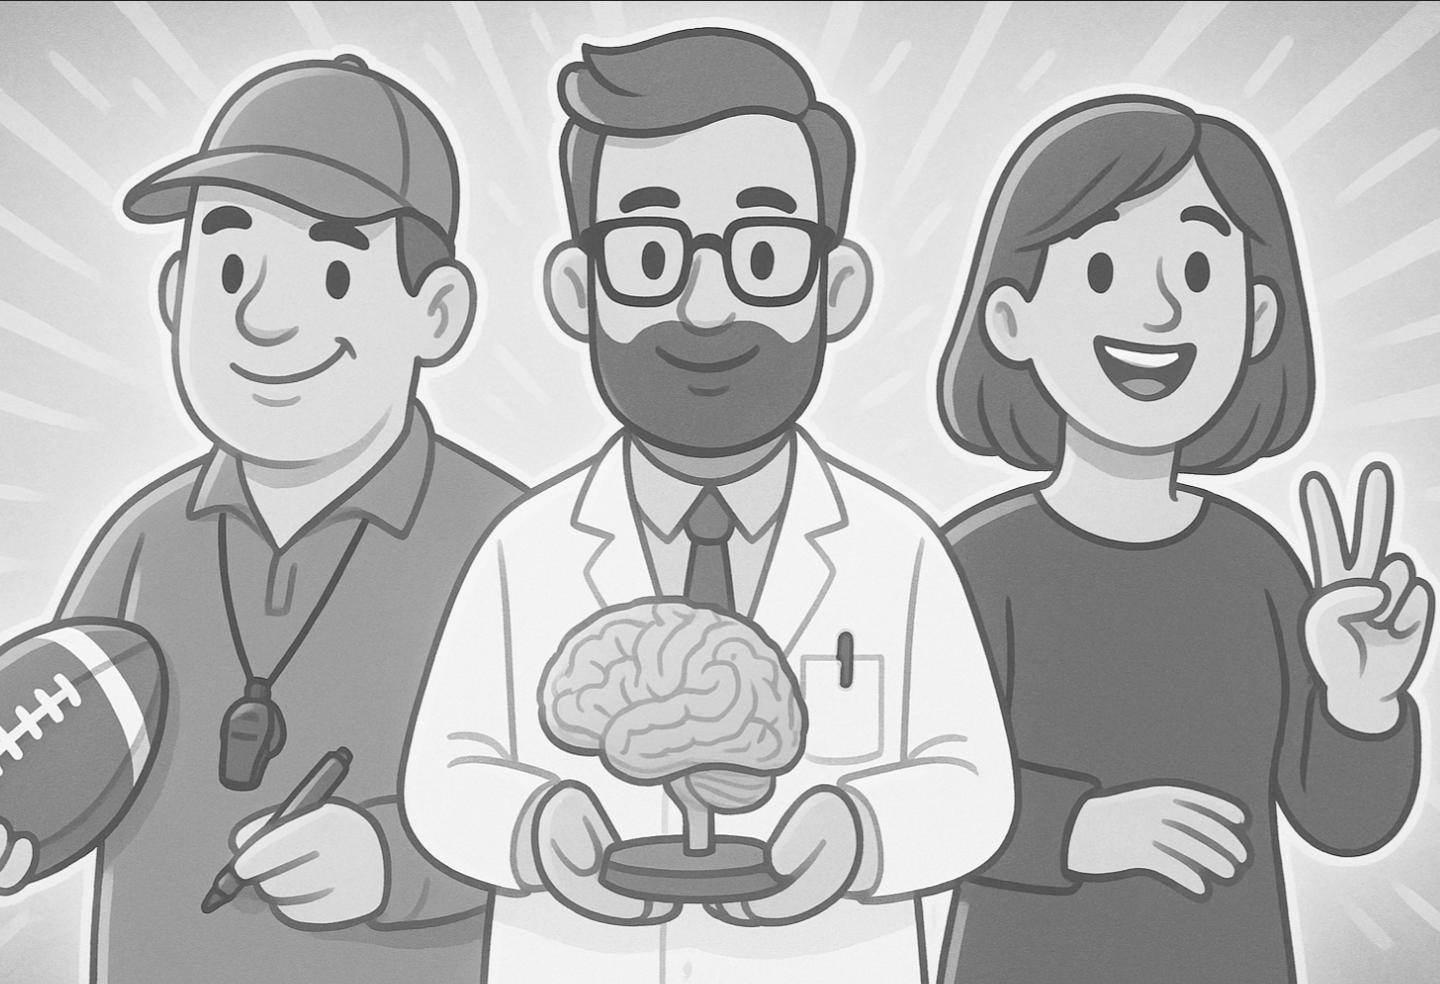

In [16]:
# Image resize
width, height = colorize_test_image.size
new_width = width - (width % 8)
new_height = height - (height % 8)
image_resized = colorize_test_image.resize((new_width, new_height))

# Prepare resized 3 channel img
image_resized = image_resized.convert("RGB")  # SD expects 3 channels
display(image_resized)

  0%|          | 0/70 [00:00<?, ?it/s]

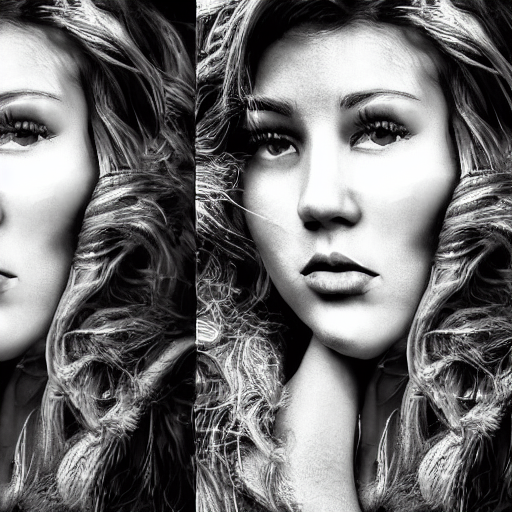

In [46]:
# Run colorization on the resized image
output = colorizer_pipe(
    prompt="colorize the grayscale image",
    image=image_resized,
    strength=0.75,  # (Default 0.8, 0 = almost identical to input, 1 = mostly generated from scratch
    guidance_scale=5, # (Default 7.5, Low 1-3, high 15-30+) How strongly the model follows the prompt (higher = more adherence)
    num_inference_steps= 70,  # (50 default) Number of denoising steps for generation (more steps = finer details, slower)
    ).images[0]

display(output)
output.save("/content/drive/MyDrive/AAI-521 Final Project/test_images/output_colorize_demo2.png")

Model 4. Image Inpainting

In [20]:
# -------------------------
# Model 4. Image Inpainting
# -------------------------


# Load pre-trained inpainting model
inpainting_model = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting"
)

# Recommended dataset (open-source)
# MS COCO, Paris StreetView, or Places2
# Create masks for missing/damaged regions
# https://places2.csail.mit.edu/
# https://cocodataset.org/#home

# Example: preprocessing images for inpainting
# Generate masks with random or structured missing parts
# Pair masked image with original image as target


model_index.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

text_encoder/pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


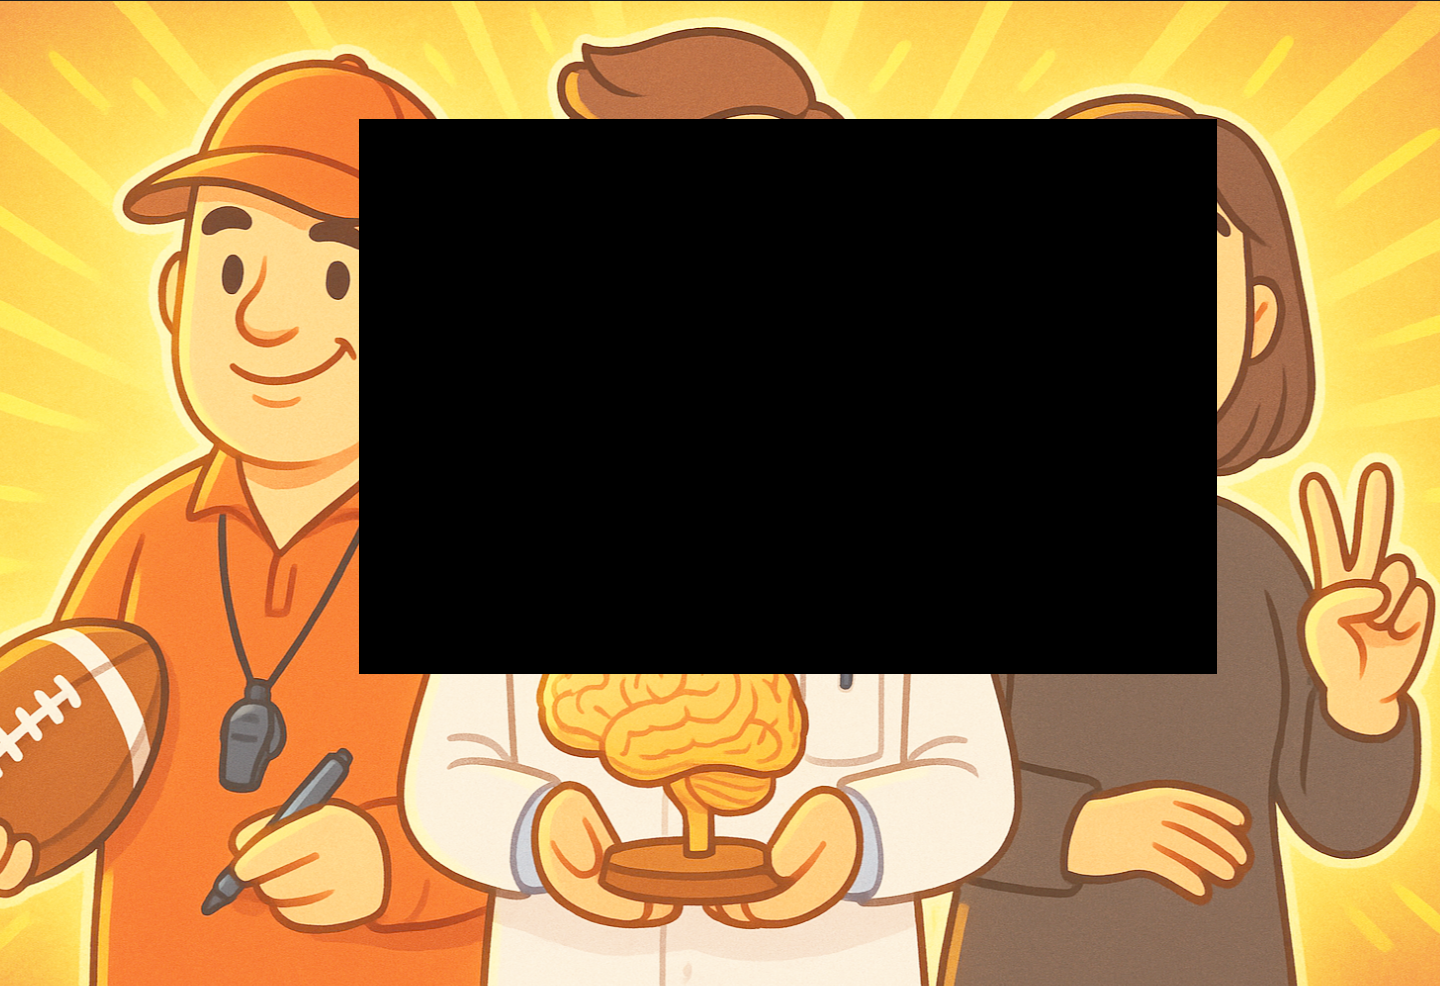

In [34]:


# Path to your test image
inpaint_test_image_path = "/content/drive/MyDrive/AAI-521 Final Project/test_images/inpaint_ex1.png"

inpaint_test_image = Image.open(inpaint_test_image_path).convert("RGB")

display(inpaint_test_image)
image.show()

In [35]:
print(type(inpaint_test_image))

<class 'PIL.Image.Image'>


# Preprocessing -  Resize to ensure width and height are divisible by 8

(StableDiffusion requirement)

In [41]:
# Resize so width and height are divisible by 8
width, height = image.size
new_width = width - (width % 8)
new_height = height - (height % 8)
inpaint_image_resized = inpaint_test_image.resize((new_width, new_height))

# Create mask for inpainting

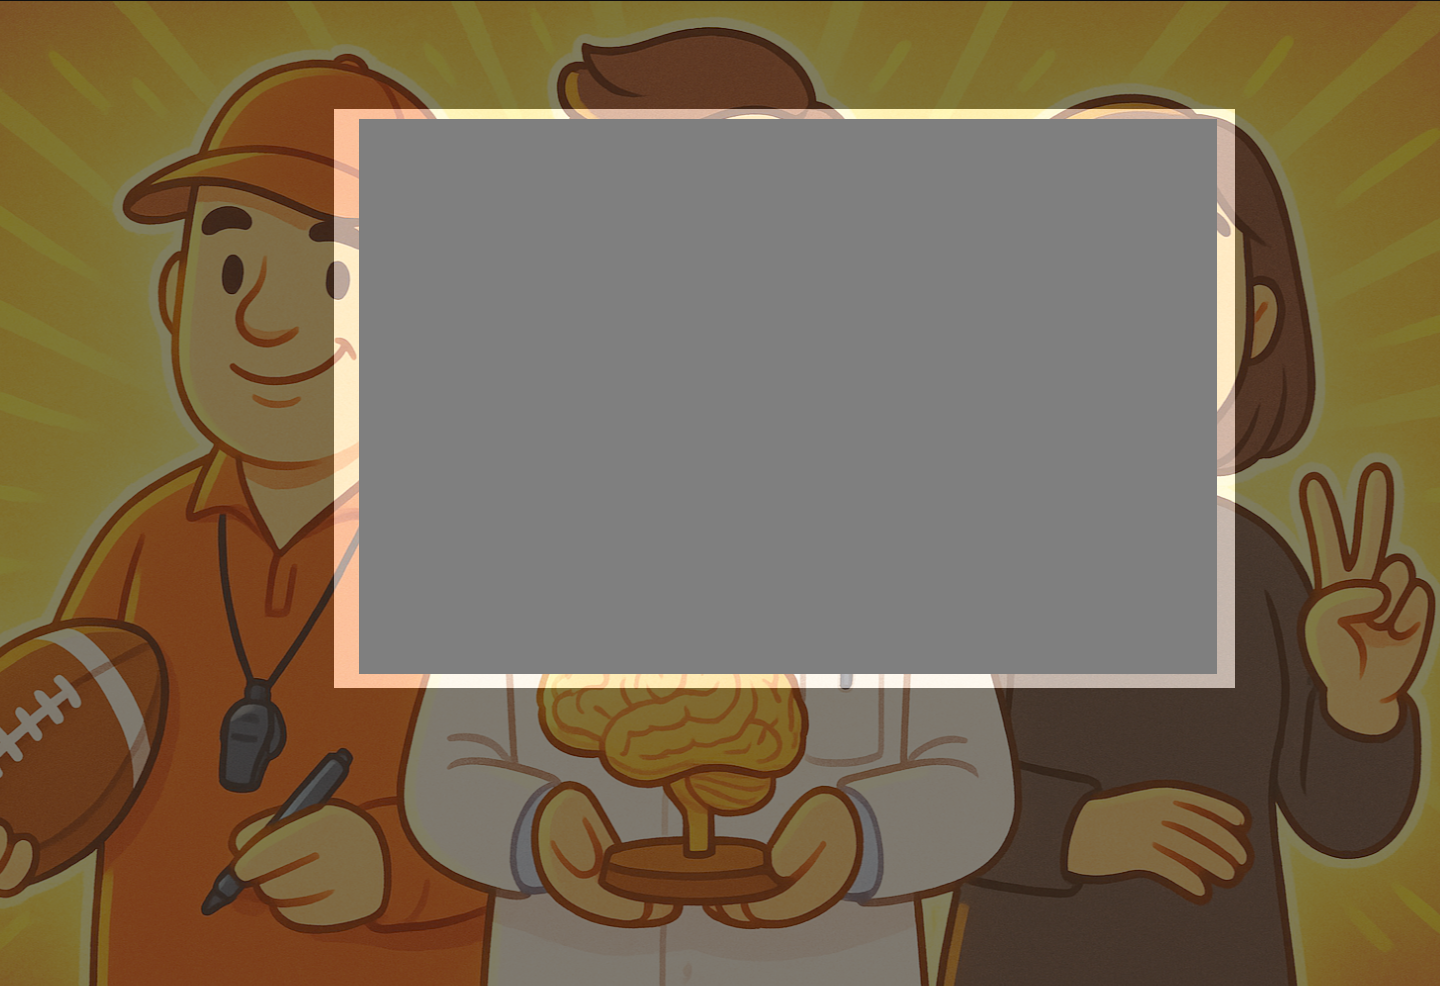

In [79]:
# Total dimensions
img_width, img_height = inpaint_test_image.size

# Create a black mask (0 = keep original)
mask = Image.new("RGB", (img_width, img_height), color=(0, 0, 0))

# Fractions for the mask position
vertical_start_fraction = 1/9       # fraction from top where mask starts - decrease to move top edge higher
vertical_end_fraction = 3/4.3       # fraction from top where mask ends - increase to move bottom edge lower (extend height)
horizontal_start_fraction = 1/4.2   # fraction from left where mask starts - decrease to move left edge further left, increase to move right
horizontal_end_fraction = 6/7       # fraction from left where mask ends - increase to extend right edge further right, decrease to shrink


# Calculate pixel coordinates
top = int(img_height * vertical_start_fraction)
bottom = int(img_height * vertical_end_fraction)
left = int(img_width * horizontal_start_fraction)
right = int(img_width * horizontal_end_fraction)

# Draw white rectangle covering the central third
draw = ImageDraw.Draw(mask)
draw.rectangle([left, top, right, bottom], fill=(255, 255, 255))

# Show mask overlayed on the original image
overlay = Image.blend(inpaint_test_image, mask, alpha=0.5)
display(overlay)

  0%|          | 0/50 [00:00<?, ?it/s]

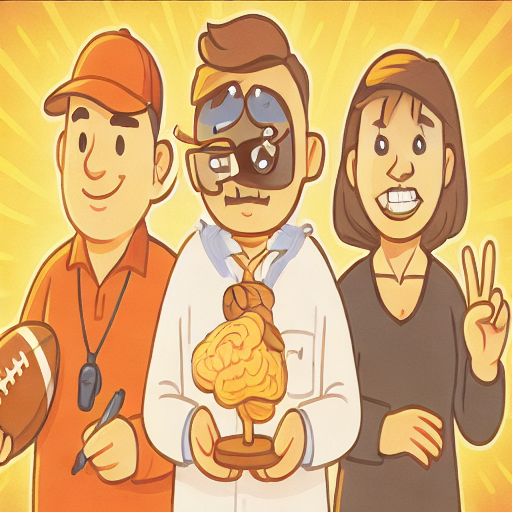

In [78]:
# Inpainting prompt
prompt = "fill in the missing parts realistically"

# Run inpainting
output = inpainting_model(prompt=prompt, image=inpaint_image_resized, mask_image=mask).images[0]

# Display and save
display(output)
output.save("/content/drive/MyDrive/AAI-521 Final Project/test_images/output_inpaint_demo.png")